In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv


# First understanding the data

In [3]:
data= pd.read_csv('/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')
data.shape

(1573, 43)

In [4]:
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [6]:
#going by the column names we can drop some of them after creating a copy of original file
data1= data.copy()
data1= data1.drop (['title', 'shipping_option_name', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id',
                   'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_id', 'crawl_month', 
                    'theme', 'currency_buyer','title_orig', 'rating_five_count', 'rating_four_count', 'rating_three_count',
                   'rating_two_count', 'rating_one_count', ], axis=1)

In [7]:
data1.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'product_picture'],
      dtype='object')

In [8]:
#checking missing values
data1[data1==0].count()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                  892
rating                            0
rating_count                     45
badges_count                   1422
badge_local_product            1544
badge_product_quality          1456
badge_fast_shipping            1553
tags                              0
product_color                     0
product_variation_size_id         0
product_variation_inventory       0
shipping_option_price             0
shipping_is_express            1569
countries_shipped_to              0
inventory_total                   0
has_urgency_banner                0
urgency_text                      0
origin_country                    0
merchant_rating_count             1
merchant_rating                   0
product_picture                   0
dtype: int64

In [9]:
data1.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000


In [10]:
#the products are being shipped to various countries
#copied this code from one of Kaggle notebook for FIFA 19 complete player dataset
countries_new= data1['countries_shipped_to'].value_counts()
countries_new= countries_new[countries_new<14].index
data1['countries_shipped_to']= data1['countries_shipped_to'].replace({x:'000' for x in countries_new})

In [11]:
data1.dtypes

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating                         float64
rating_count                     int64
badges_count                     int64
badge_local_product              int64
badge_product_quality            int64
badge_fast_shipping              int64
tags                            object
product_color                   object
product_variation_size_id       object
product_variation_inventory      int64
shipping_option_price            int64
shipping_is_express              int64
countries_shipped_to            object
inventory_total                  int64
has_urgency_banner             float64
urgency_text                    object
origin_country                  object
merchant_rating_count            int64
merchant_rating                float64
product_picture                 object
dtype: object

In [12]:
#converting countries_shipped_to into an integer value
data1['countries_shipped_to'] = pd.to_numeric(data1['countries_shipped_to'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

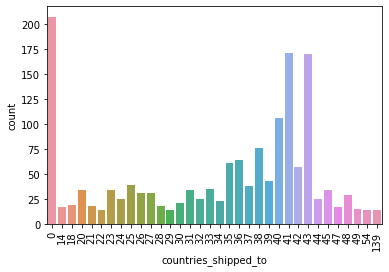

In [13]:
#visualizing the top 5 countries where the products are being shipped
sns.countplot(data1.countries_shipped_to)
plt.xticks(rotation=90)

The country codes are not mentioned in the dataset but we can see that the top 5 countries where most of the products are being shipped are 41, 43, 40, 38 and 36

In [14]:
#Some visulaization of the output i.e. the number of units sold with various input variables will help to understand
#the data in a much better way

Text(0.5, 1.0, 'Effect of running ads on the number of units sold for a product')

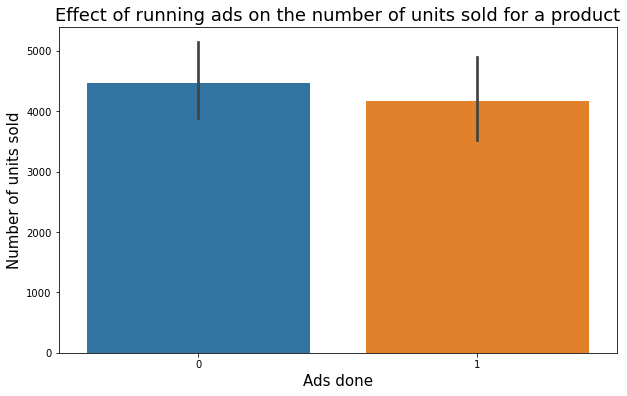

In [15]:
#there is not much affect whether an ad has been run for a product or not
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='uses_ad_boosts', y="units_sold", data=data1)
# set labels
plt.xlabel("Ads done", size=15)
plt.ylabel("Number of units sold", size=15)
plt.title("Effect of running ads on the number of units sold for a product", size=18)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

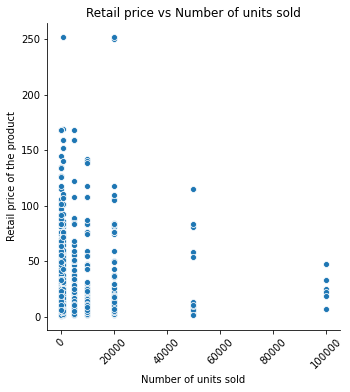

In [16]:
#understanding the relationship between retial price of a product with its unit
sns.relplot(x= 'units_sold', y='retail_price', sizes= (15,200), data=data1)
plt.xlabel('Number of units sold')
plt.ylabel("Retail price of the product")
plt.title('Retail price vs Number of units sold')
plt.xticks(rotation=45)

In [17]:
#We can clearly observe that product with less price are supposed to sale more

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

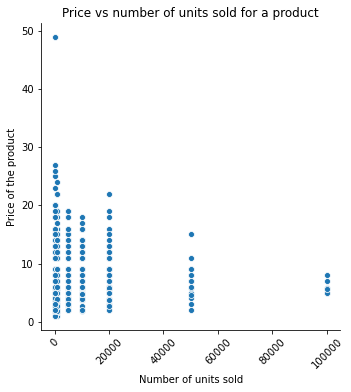

In [18]:
sns.relplot(x= 'units_sold', y='price', sizes= (15,200), data=data1)
plt.xlabel('Number of units sold')
plt.ylabel("Price of the product")
plt.title('Price vs number of units sold for a product')
plt.xticks(rotation=45)

In [19]:
#cannot compare for price and retail price with the number of units sold for a product bcoz of uneven distribution of data point

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

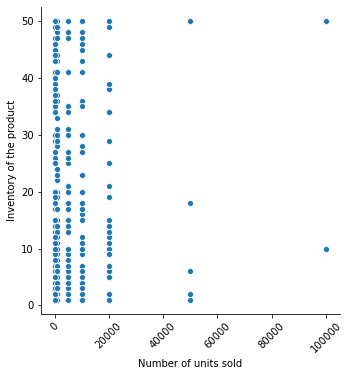

In [20]:
#the number of units sold for any product increases with the number of iinventories but to a certain limit only
sns.relplot(x= 'units_sold', y='product_variation_inventory', data=data1)
plt.xlabel('Number of units sold')
plt.ylabel("Inventory of the product")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Local product vs Number of units sold')

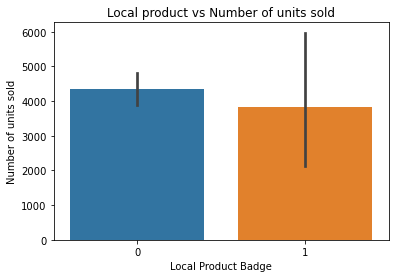

In [21]:
sns.barplot (x= 'badge_local_product', y= 'units_sold', data= data1)
plt.xlabel('Local Product Badge')
plt.ylabel('Number of units sold')
plt.title('Local product vs Number of units sold')
#people are not ready to buy local products

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

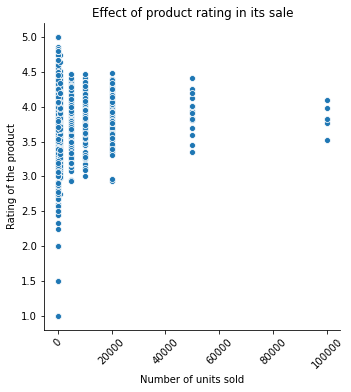

In [22]:
#as the rating of the product increases number of units sold also increases
sns.relplot(x= 'units_sold', y='rating', data=data1)
plt.xlabel('Number of units sold')
plt.ylabel("Rating of the product")
plt.title('Effect of product rating in its sale')
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

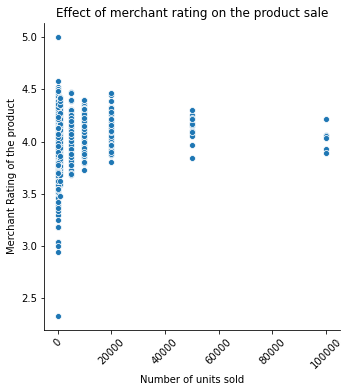

In [23]:
#as the merchant rating of the product increases number of units sold also increases
sns.relplot(x= 'units_sold', y='merchant_rating', data=data1)
plt.xlabel('Number of units sold')
plt.ylabel("Merchant Rating of the product")
plt.title('Effect of merchant rating on the product sale')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Quality of the product vs its sales')

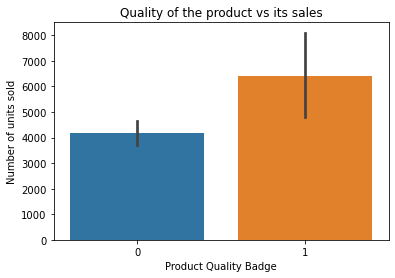

In [24]:
#quality of the product plays an important role in its sale
sns.barplot (x= 'badge_product_quality', y= 'units_sold', data= data1)
plt.xlabel('Product Quality Badge')
plt.ylabel('Number of units sold')
plt.title('Quality of the product vs its sales')

In [25]:
print('The maximum number of units sold for any product is:', data1['units_sold'].max())
print('The minimum number of units sold for any product is:', data1['units_sold'].min())
print('The average number of units sold for any product is:', data1['units_sold'].mean())
print('The average price for all the product in the month of August 2020 is:', data1.price.mean())
print('The average retail price of all the products in the month of August 2020 is:', data1.price.mean())

The maximum number of units sold for any product is: 100000
The minimum number of units sold for any product is: 1
The average number of units sold for any product is: 4339.005085823268
The average price for all the product in the month of August 2020 is: 8.325371900826434
The average retail price of all the products in the month of August 2020 is: 8.325371900826434


In [26]:
data1.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,32.358551,49.821360,1.0,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,17.556702,2.562799,0.0,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,25.000000,50.000000,1.0,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,37.000000,50.000000,1.0,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,41.000000,50.000000,1.0,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,139.000000,50.000000,1.0,2.174765e+06,5.000000


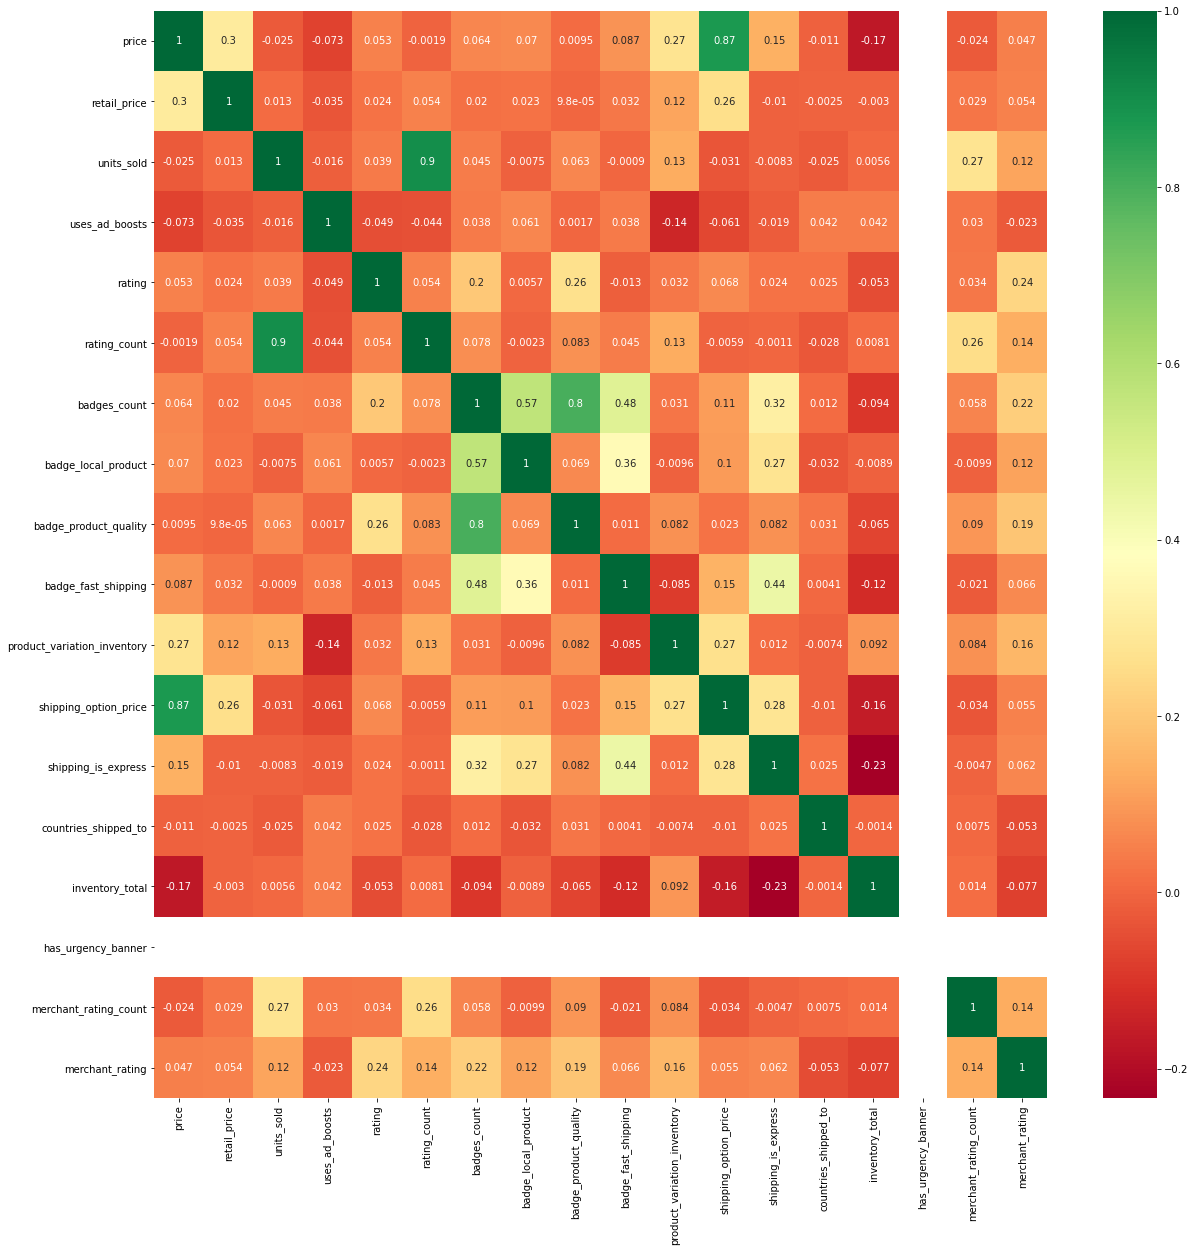

In [27]:
#generatiing heatmap
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
#from the heat map we can clearly see that rating count, merchant rating count, merchant rating, 
#product variation inventory, badge product quality, badge fast shipping, badge local product, 
#shippingis express, countries shipped to, price, retail price are the variables which are affecting the output to a much greater extent
#can drop rest of the variables

In [29]:
data_model= data1.drop(['uses_ad_boosts', 'tags', 'product_color', 'product_variation_size_id', 'shipping_option_price',
                       'inventory_total', 'has_urgency_banner', 'urgency_text', 'origin_country', 'product_picture'], axis=1)

In [30]:
data_model.shape

(1573, 14)

In [31]:
from sklearn import preprocessing 

encoder = preprocessing.LabelEncoder()

for i in data_model.columns:
    if isinstance(data_model[i][0], str):
            data_model[i] = encoder.fit_transform(data_model[i])

In [32]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(data_model) 
scaled_data = scalar.transform(data_model)

In [33]:
X= data_model.drop('units_sold', axis=1)

In [34]:
y= data_model.units_sold

In [35]:
#Using Linear Regression model

In [36]:
#train test split
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split (X,y, test_size=0.25, random_state = 1333)

In [37]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [38]:
model_tr = linear_model.LinearRegression()
model_tr.fit(x_tr, y_tr)
model_tr.score(x_tr, y_tr)

0.8235514996771973

In [39]:
model_tr.fit(x_ts, y_ts)
model_tr.score(x_ts, y_ts)

0.7891688024438734

In [40]:
#with Linear Regression model, for predicting the number of units sold for any product the accuracy achieved is 79%